<a href="https://colab.research.google.com/github/iamfaham/linear_regression_pytorch/blob/main/Linear_Regression_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression with PyTorch
This notebook demonstrates linear regression using PyTorch.

In [8]:
import torch
import torch.nn as nn
from matplotlib import pyplot as plt

### Data Generation
We generate a simple linear dataset (toy dataset) with some noise and split it into training and validation sets.

In [9]:
# 1) Generate data
N = 250
x = torch.linspace(0, 15, N).reshape(-1, 1)
y_true = 3*x + 2 + 0.4*torch.randn(x.size())

# Splitting dataset into training and validation sets
train_split = int(0.8 * len(x))
x_train, y_train = x[:train_split], y_true[:train_split]
x_val, y_val = x[train_split:], y_true[train_split:]
len(x_train), len(x_val)

(200, 50)

### Model Definition
We define a simple linear regression model using `torch.nn.Linear`, which consists of a single neuron.

In [10]:
# 2) Creating the model
linear_regression_model = nn.Linear(1,1)

### Loss Function and Optimizer
Here, we are using Mean Squared Error (MSE) as the loss function, and Stochastic Gradient Descent (SGD) as the optimizer.

In [11]:
# 3) Loss function and optimizer
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(linear_regression_model.parameters(), lr=0.01)

### Training Loop
We train the model for 700 epochs, updating the weights using backpropagation and gradient descent.

In [12]:
# 4) Training loop
for epoch in range(700):
  linear_regression_model.train()     # Training mode
  y_pred = linear_regression_model(x_train)
  loss = loss_function(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if epoch % 50 == 0:
    print(f"Epoch {epoch}, Loss {loss.item():.4f}")

Epoch 0, Loss 360.2873
Epoch 50, Loss 0.3030
Epoch 100, Loss 0.2504
Epoch 150, Loss 0.2185
Epoch 200, Loss 0.1990
Epoch 250, Loss 0.1872
Epoch 300, Loss 0.1800
Epoch 350, Loss 0.1756
Epoch 400, Loss 0.1729
Epoch 450, Loss 0.1713
Epoch 500, Loss 0.1703
Epoch 550, Loss 0.1697
Epoch 600, Loss 0.1694
Epoch 650, Loss 0.1691


The loss is decreasing steadily, which is a good sign for our model.





### Visualization
We plot the validation data, along with the fitted regression line.

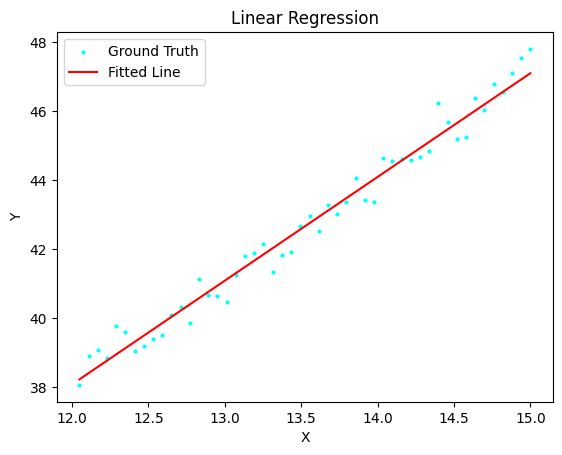

In [13]:
# 5) Plotting the graph
x_values = x_val.numpy()
y_pred_values = linear_regression_model(x_val).detach().numpy()
y_true_values = y_val.numpy()

# Plot for validation data / data points
plt.scatter(x_values, y_true_values, s=4, label="Ground Truth", color="cyan")

# Plot for fitted regression line across data points
plt.plot(x_values, y_pred_values, label="Fitted Line", color="red")

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression")
plt.legend()
plt.show()


### Evaluation
After training, we evaluate the model on the validation set to compute the final loss.

In [14]:
# 6) Evaluation and difference calculation
linear_regression_model.eval()    # Evaluation mode
with torch.inference_mode():
  w_true, b_true = 3, 2     # Values from the equation y = 3x + 2 + e
  w, b = linear_regression_model.weight.item(), linear_regression_model.bias.item()
  print(f"w = {w:.3f}, b = {b:.3f}")
  print(f"w_true = {w_true:.3f}, b_true = {b_true:.3f}")
  print("Difference: ", f"w = {(w-w_true):.3f}, b = {(b-b_true):.3f}")

w = 3.005, b = 2.022
w_true = 3.000, b_true = 2.000
Difference:  w = 0.005, b = 0.022


The above comparison shows that there is just a minimal difference between actual weights and bias and the predicted ones. Hence our model training is successful.